In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("C:/Users/dell/Downloads/archive/fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


In [5]:
df.size

46772

In [6]:
df.shape

(2126, 22)

In [7]:
df.describe()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [8]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [10]:
df.isnull()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [12]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [13]:
df.drop_duplicates(keep='first',inplace=True)

In [14]:
df.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


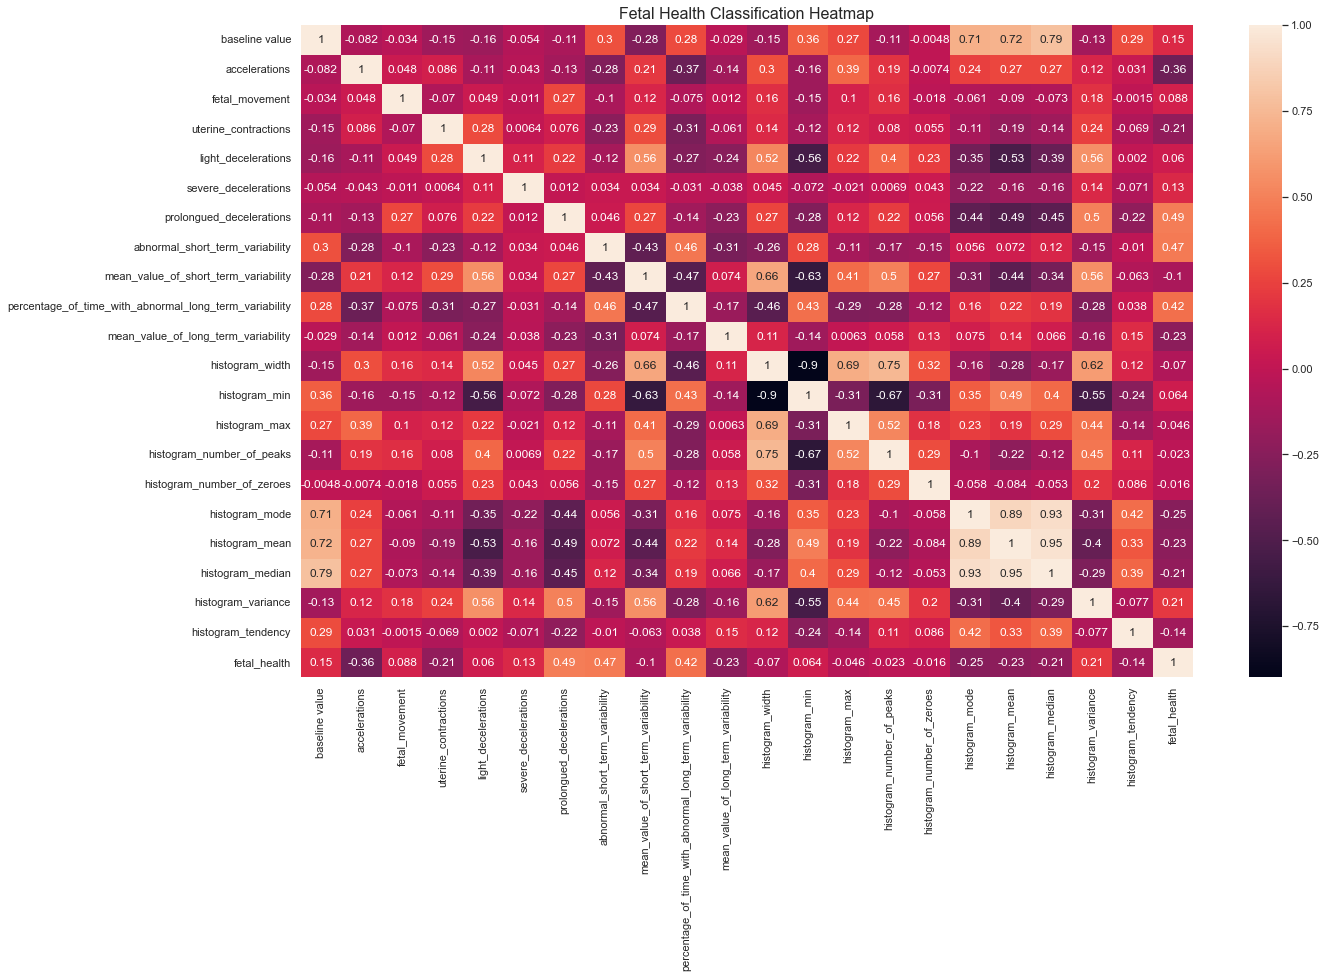

In [15]:
sns.set(font_scale=1.0)
plt.figure(figsize=(20, 12)) 
plt.title('Fetal Health Classification Heatmap', fontsize=16)
heatmap = sns.heatmap(df.corr(), annot=True)

In [16]:
df.shape

(2113, 22)

In [17]:
df['fetal_health'].value_counts()

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

In [17]:
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [18]:
X = df.iloc[:, 0:21]
Y = df.iloc[:, -1]

In [19]:
test = SelectKBest(score_func=f_classif, k=15)
fit = test.fit(X, Y)

In [20]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [21]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(15,'Score'))  

                                                Specs       Score
6                            prolongued_decelerations  507.304309
7                     abnormal_short_term_variability  337.703020
9   percentage_of_time_with_abnormal_long_term_var...  335.386156
17                                     histogram_mean  298.759569
16                                     histogram_mode  276.382795
18                                   histogram_median  249.699523
1                                       accelerations  194.618345
19                                 histogram_variance  150.955827
0                                      baseline value  137.833999
8                mean_value_of_short_term_variability  118.050463
3                                uterine_contractions   93.647474
12                                      histogram_min   86.468440
10                mean_value_of_long_term_variability   69.418940
4                                 light_decelerations   66.750344
11        

In [22]:
data=featureScores.nlargest(15,"Score")

In [23]:
data

,Specs,Score
6,prolongued_decelerations,507.304309
7,abnormal_short_term_variability,337.703020
9,percentage_of_time_with_abnormal_long_term_var...,335.386156
17,histogram_mean,298.759569
16,histogram_mode,276.382795
18,histogram_median,249.699523
1,accelerations,194.618345
19,histogram_variance,150.955827
0,baseline value,137.833999
8,mean_value_of_short_term_variability,118.050463


In [24]:
x=df.iloc[:,[6,7,9,17,16,18,1,19,0,8,3]].values
y=df.iloc[:,21].values

In [25]:
data1=[]
data2=[]

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [28]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
 
print (xtrain[0:10, :])

[[-0.27162618 -0.53235547 -0.54795423  0.01731897 -0.09235125 -0.07850276
   0.72477418 -0.51943215 -0.33919294 -0.36396408  0.53415816]
 [-0.27162618 -1.22468386 -0.33542508 -0.81710603 -0.70754093 -0.90596427
  -0.81852909 -0.55534005 -1.14571571 -0.02863828 -1.16397445]
 [-0.27162618 -0.87851967  0.08963323 -0.62454642 -0.76905989 -0.83700914
   0.46755697 -0.51943215 -1.14571571 -0.25218882  0.53415816]
 [-0.27162618  0.04458486 -0.44168966  1.5577959   1.38410396  1.50746514
  -0.04687746 -0.59124795  1.17303727 -0.69928989  0.53415816]
 [-0.27162618  0.96768938 -0.54795423 -1.65153104  0.27676255  0.81791388
  -0.30409467  1.27596266  0.87059123  2.98929397 -1.16397445]
 [-0.27162618 -1.22468386 -0.54795423 -0.56035988 -0.27690816 -0.42327839
  -0.81852909  0.59371263 -0.13756224  0.53023806  0.53415816]
 [-0.27162618  0.33305502 -0.54795423  0.65918436  0.33828152  0.54209337
  -0.81852909 -0.55534005  0.66896053 -0.69928989 -0.82434792]
 [-0.27162618 -0.70543757 -0.54795423  0.

In [29]:
classifier = LogisticRegression(random_state = 40,multi_class='multinomial', solver='lbfgs')
classifier.fit(xtrain, ytrain)

LogisticRegression(multi_class='multinomial', random_state=40)

In [30]:
y_pred = classifier.predict(xtest)

In [31]:
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[327  11   3]
 [ 19  33   2]
 [  4   1  23]]


In [32]:
print ("Accuracy : ",accuracy_score(ytest, y_pred))

Accuracy :  0.9054373522458629


In [33]:
data1.append('Logistic Regression')
data2.append(accuracy_score(ytest, y_pred))

In [34]:
data1

['Logistic Regression']

In [35]:
data2

[0.9054373522458629]

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(xtrain, ytrain)
y_pred = regressor.predict(xtest)

In [38]:
accuracy_score(ytest,y_pred)

0.9645390070921985

In [39]:
cm = confusion_matrix(ytest, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[337   4   0]
 [ 11  43   0]
 [  0   0  28]]


In [40]:
data1.append('Random Forest')
data2.append(accuracy_score(ytest,y_pred))

In [41]:
data1

['Logistic Regression', 'Random Forest']

In [42]:
data2

[0.9054373522458629, 0.9645390070921985]

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean', p = 2)
classifier.fit(xtrain, ytrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [44]:
y_pred=classifier.predict(xtest)

In [45]:
accuracy_score(ytest, y_pred)

0.9479905437352246

In [46]:
cm = confusion_matrix(ytest, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[333   7   1]
 [ 14  40   0]
 [  0   0  28]]


In [47]:
data1.append('KNN')
data2.append(accuracy_score(ytest, y_pred))

In [48]:
data1

['Logistic Regression', 'Random Forest', 'KNN']

In [49]:
data2

[0.9054373522458629, 0.9645390070921985, 0.9479905437352246]

In [50]:
from sklearn.svm import SVC

In [51]:
svc_model = SVC(C= 1.0, kernel='rbf', gamma= 1)
svc_model.fit(xtrain, ytrain)
  
y_pred = svc_model .predict(xtest)
# check the accuracy on the training set
print(svc_model.score(xtrain, ytrain))
print(svc_model.score(xtest, ytest))

0.972189349112426
0.9290780141843972


In [52]:
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[337   4   0]
 [ 16  38   0]
 [ 10   0  18]]


In [53]:
data1.append('support vector')
data2.append(svc_model.score(xtest, ytest))

In [54]:
data1

['Logistic Regression', 'Random Forest', 'KNN', 'support vector']

In [55]:
data2

[0.9054373522458629,
 0.9645390070921985,
 0.9479905437352246,
 0.9290780141843972]

In [56]:
svc_model = SVC(C=6.0, kernel='linear', gamma= 1)
svc_model.fit(xtrain, ytrain)
  
y_pred = svc_model .predict(xtest)
# check the accuracy on the training set
print(svc_model.score(xtrain, ytrain))
print(svc_model.score(xtest, ytest))

0.901775147928994
0.9219858156028369


In [57]:
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[328  11   2]
 [ 16  36   2]
 [  2   0  26]]


In [58]:
data1.append('Linear SVC')
data2.append(svc_model.score(xtest, ytest))

In [59]:
data1

['Logistic Regression', 'Random Forest', 'KNN', 'support vector', 'Linear SVC']

In [60]:
data2

[0.9054373522458629,
 0.9645390070921985,
 0.9479905437352246,
 0.9290780141843972,
 0.9219858156028369]

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt = DecisionTreeClassifier()

In [63]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [64]:
from sklearn import tree
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_9 <= -0.87
|   |--- feature_2 <= 3.09
|   |   |--- feature_1 <= 0.71
|   |   |   |--- feature_4 <= 0.55
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_4 >  0.55
|   |   |   |   |--- feature_2 <= 2.67
|   |   |   |   |   |--- feature_7 <= -0.50
|   |   |   |   |   |   |--- feature_8 <= 1.37
|   |   |   |   |   |   |   |--- feature_2 <= 0.73
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- feature_2 >  0.73
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.48
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- feature_1 >  0.48
|   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |--- feature_8 >  1.37
|   |   |   |   |   |   |   |--- feature_4 <= 1.01
|   |   |   |   |   |   |   |   |--- feature_7 <= -0.57
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- feature_7 >  -0.57
|   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   

In [65]:
y_pred=dt.predict(xtest)

In [66]:
accuracy_score(ytest, y_pred)

0.9314420803782506

In [67]:
cm = confusion_matrix(ytest, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[327  11   3]
 [ 15  39   0]
 [  0   0  28]]


In [68]:
data1.append('Decision tree')
data2.append(accuracy_score(ytest, y_pred))

In [69]:
data1

['Logistic Regression',
 'Random Forest',
 'KNN',
 'support vector',
 'Linear SVC',
 'Decision tree']

In [70]:
data2

[0.9054373522458629,
 0.9645390070921985,
 0.9479905437352246,
 0.9290780141843972,
 0.9219858156028369,
 0.9314420803782506]

In [71]:
from sklearn.neural_network import MLPClassifier

In [72]:
mlp = MLPClassifier(hidden_layer_sizes=(1000,100),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.005)

# Fit data onto the model
mlp.fit(xtrain,ytrain)

Iteration 1, loss = 0.52589312
Iteration 2, loss = 0.27386281
Iteration 3, loss = 0.23370244
Iteration 4, loss = 0.20918917
Iteration 5, loss = 0.19711214
Iteration 6, loss = 0.18308761
Iteration 7, loss = 0.17384253
Iteration 8, loss = 0.17628402
Iteration 9, loss = 0.15727266
Iteration 10, loss = 0.13941929
Iteration 11, loss = 0.15166704
Iteration 12, loss = 0.14696873
Iteration 13, loss = 0.16671277
Iteration 14, loss = 0.15088715
Iteration 15, loss = 0.13788809
Iteration 16, loss = 0.14153596
Iteration 17, loss = 0.13385624
Iteration 18, loss = 0.13003401
Iteration 19, loss = 0.12597775
Iteration 20, loss = 0.14757093
Iteration 21, loss = 0.12147701
Iteration 22, loss = 0.12654115
Iteration 23, loss = 0.11897241
Iteration 24, loss = 0.12587620
Iteration 25, loss = 0.10985827
Iteration 26, loss = 0.11176333
Iteration 27, loss = 0.10381719
Iteration 28, loss = 0.10875917
Iteration 29, loss = 0.10579249
Iteration 30, loss = 0.09868355
Iteration 31, loss = 0.09004623
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(1000, 100), learning_rate_init=0.005,
              random_state=5, verbose=True)

In [73]:
y_pred=mlp.predict(xtest)

In [74]:
accuracy_score(ytest, y_pred)

0.966903073286052

In [75]:
cm = confusion_matrix(ytest, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[337   4   0]
 [  8  46   0]
 [  1   1  26]]


In [76]:
data1.append('MLP')
data2.append(accuracy_score(ytest, y_pred))

In [77]:
data1

['Logistic Regression',
 'Random Forest',
 'KNN',
 'support vector',
 'Linear SVC',
 'Decision tree',
 'MLP']

In [78]:
data2

[0.9054373522458629,
 0.9645390070921985,
 0.9479905437352246,
 0.9290780141843972,
 0.9219858156028369,
 0.9314420803782506,
 0.966903073286052]

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
gb = GradientBoostingClassifier(learning_rate=0.1)
gb.fit(xtrain,ytrain)
y_pred=gb.predict(xtest)
accuracy_score(ytest,y_pred)

0.9645390070921985

In [81]:
cm = confusion_matrix(ytest, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[337   3   1]
 [ 11  43   0]
 [  0   0  28]]


In [82]:
gb = GradientBoostingClassifier(learning_rate=0.15)

In [83]:
gb.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.15)

In [84]:
y_pred=gb.predict(xtest)

In [85]:
accuracy_score(ytest,y_pred)

0.9716312056737588

In [86]:
cm = confusion_matrix(ytest, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[338   2   1]
 [  9  45   0]
 [  0   0  28]]


In [87]:
gb = GradientBoostingClassifier(learning_rate=1)
gb.fit(xtrain,ytrain)
y_pred=gb.predict(xtest)
accuracy_score(ytest,y_pred)

0.9598108747044918

In [88]:
data1.append('GradientBoosting')
data2.append(accuracy_score(ytest,y_pred))

In [89]:
data1

['Logistic Regression',
 'Random Forest',
 'KNN',
 'support vector',
 'Linear SVC',
 'Decision tree',
 'MLP',
 'GradientBoosting']

In [90]:
data2

[0.9054373522458629,
 0.9645390070921985,
 0.9479905437352246,
 0.9290780141843972,
 0.9219858156028369,
 0.9314420803782506,
 0.966903073286052,
 0.9598108747044918]

In [91]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=12,
                          learning_rate=0.9,
                          depth=10)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
accuracy_score(ytest,y_pred)

0:	learn: 0.4250930	total: 371ms	remaining: 4.08s
1:	learn: 0.3100112	total: 457ms	remaining: 2.29s
2:	learn: 0.2429191	total: 501ms	remaining: 1.5s
3:	learn: 0.1837667	total: 537ms	remaining: 1.07s
4:	learn: 0.1606941	total: 574ms	remaining: 803ms
5:	learn: 0.1481189	total: 613ms	remaining: 613ms
6:	learn: 0.1332786	total: 658ms	remaining: 470ms
7:	learn: 0.1179839	total: 739ms	remaining: 370ms
8:	learn: 0.1102636	total: 814ms	remaining: 271ms
9:	learn: 0.0978338	total: 898ms	remaining: 180ms
10:	learn: 0.0900064	total: 954ms	remaining: 86.7ms
11:	learn: 0.0815112	total: 993ms	remaining: 0us


0.9598108747044918

In [92]:
cm = confusion_matrix(ytest, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[334   7   0]
 [ 10  44   0]
 [  0   0  28]]


In [93]:
data1.append('CatBoostClassifier')
data2.append(accuracy_score(ytest,y_pred))

In [94]:
data1

['Logistic Regression',
 'Random Forest',
 'KNN',
 'support vector',
 'Linear SVC',
 'Decision tree',
 'MLP',
 'GradientBoosting',
 'CatBoostClassifier']

In [95]:
data2

[0.9054373522458629,
 0.9645390070921985,
 0.9479905437352246,
 0.9290780141843972,
 0.9219858156028369,
 0.9314420803782506,
 0.966903073286052,
 0.9598108747044918,
 0.9598108747044918]

In [96]:
import lightgbm as ltb

In [97]:
ltgbm = ltb.LGBMClassifier()
ltgbm.fit(xtrain, ytrain)
y_pred=ltgbm.predict(xtest)
accuracy_score(ytest,y_pred)

0.9763593380614657

In [98]:
cm = confusion_matrix(ytest, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[338   3   0]
 [  7  47   0]
 [  0   0  28]]


In [99]:
data1.append('LightGBM')
data2.append(accuracy_score(ytest,y_pred))

In [100]:
data1

['Logistic Regression',
 'Random Forest',
 'KNN',
 'support vector',
 'Linear SVC',
 'Decision tree',
 'MLP',
 'GradientBoosting',
 'CatBoostClassifier',
 'LightGBM']

In [101]:
data2

[0.9054373522458629,
 0.9645390070921985,
 0.9479905437352246,
 0.9290780141843972,
 0.9219858156028369,
 0.9314420803782506,
 0.966903073286052,
 0.9598108747044918,
 0.9598108747044918,
 0.9763593380614657]

In [102]:
import xgboost as xgb

In [103]:
clf=xgb.XGBClassifier()

In [104]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest=le.fit_transform(ytest)


In [105]:
clf.fit(xtrain, ytrain)
y_pred=clf.predict(xtest)
accuracy_score(ytest,y_pred)

0.9645390070921985

In [106]:
cm = confusion_matrix(ytest, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[338   3   0]
 [ 11  43   0]
 [  0   1  27]]


In [107]:
data1.append('xgboost')
data2.append(accuracy_score(ytest,y_pred))

In [108]:
list(zip(data1,data2))

[('Logistic Regression', 0.9054373522458629),
 ('Random Forest', 0.9645390070921985),
 ('KNN', 0.9479905437352246),
 ('support vector', 0.9290780141843972),
 ('Linear SVC', 0.9219858156028369),
 ('Decision tree', 0.9314420803782506),
 ('MLP', 0.966903073286052),
 ('GradientBoosting', 0.9598108747044918),
 ('CatBoostClassifier', 0.9598108747044918),
 ('LightGBM', 0.9763593380614657),
 ('xgboost', 0.9645390070921985)]

In [109]:
scores=pd.DataFrame(list(zip(data1,data2)),columns=['Algo','Score'])

In [110]:
scores.nlargest(11,"Score")

,Algo,Score
9,LightGBM,0.976359
6,MLP,0.966903
1,Random Forest,0.964539
10,xgboost,0.964539
7,GradientBoosting,0.959811
8,CatBoostClassifier,0.959811
2,KNN,0.947991
5,Decision tree,0.931442
3,support vector,0.929078
4,Linear SVC,0.921986
